In [139]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.cm as cm    
import matplotlib as mpl
import matplotlib.image as mpimg
from matplotlib import font_manager
import seaborn as sns 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

#선명도
%config inlinebackend.figure_format = "retina"

#한글깨짐 해결
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

In [197]:

import FinanceDataReader as fdr
# fdr.DataReader(코드값, 시작날짜, 끝날짜)
snp500 = fdr.DataReader("US500",'2022-01-01')
kospi = fdr.DataReader("KS11", '2022-01-01')
ks200 = fdr.DataReader("KS200", '2022-01-01')
# 종가만 가져오기
kospi200 = ks200[["Close"]]
snp500 = snp500[["Close"]]
kospi = kospi[["Close"]]

# 이름 변경
snp500.rename({"Close":"SNP500"}, axis=1, inplace=True)
kospi200.rename({"Close":"KS200"}, axis=1, inplace=True)
kospi.rename({"Close":"KOSPI"}, axis=1, inplace=True)

# 병합
indic = pd.concat([kospi200, snp500], axis=1)
indic = pd.concat([indic, kospi], axis=1)

# null값 제거
indic.dropna(axis=0, inplace=True)

# index설정 초기화 후, df에 저장하여 사용
df = indic.reset_index()
df

,Date,KS200,SNP500,KOSPI
0,2022-01-04,395.399994,4793.540039,2989.239990
1,2022-01-05,390.390015,4700.580078,2953.969971
2,2022-01-06,386.220001,4696.049805,2920.530029
3,2022-01-07,390.850006,4677.029785,2954.889893
4,2022-01-10,387.519989,4670.290039,2926.719971
...,...,...,...,...
321,2023-05-15,324.459991,4136.279785,2479.350098
322,2023-05-16,325.309998,4109.899902,2480.239990
323,2023-05-17,326.609985,4158.770020,2494.659912
324,2023-05-18,329.839996,4198.049805,2515.399902


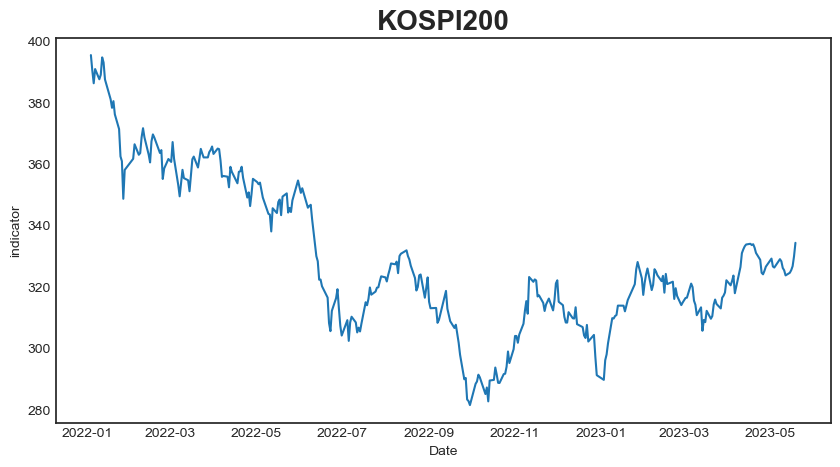

In [198]:
plt.figure(figsize=(10,5))

plt.style.use("seaborn-white")
plt.plot(df["Date"], df["KS200"])
plt.title("KOSPI200", fontdict={"size":20, "weight":"bold"})
plt.xlabel("Date")
plt.ylabel("indicator");

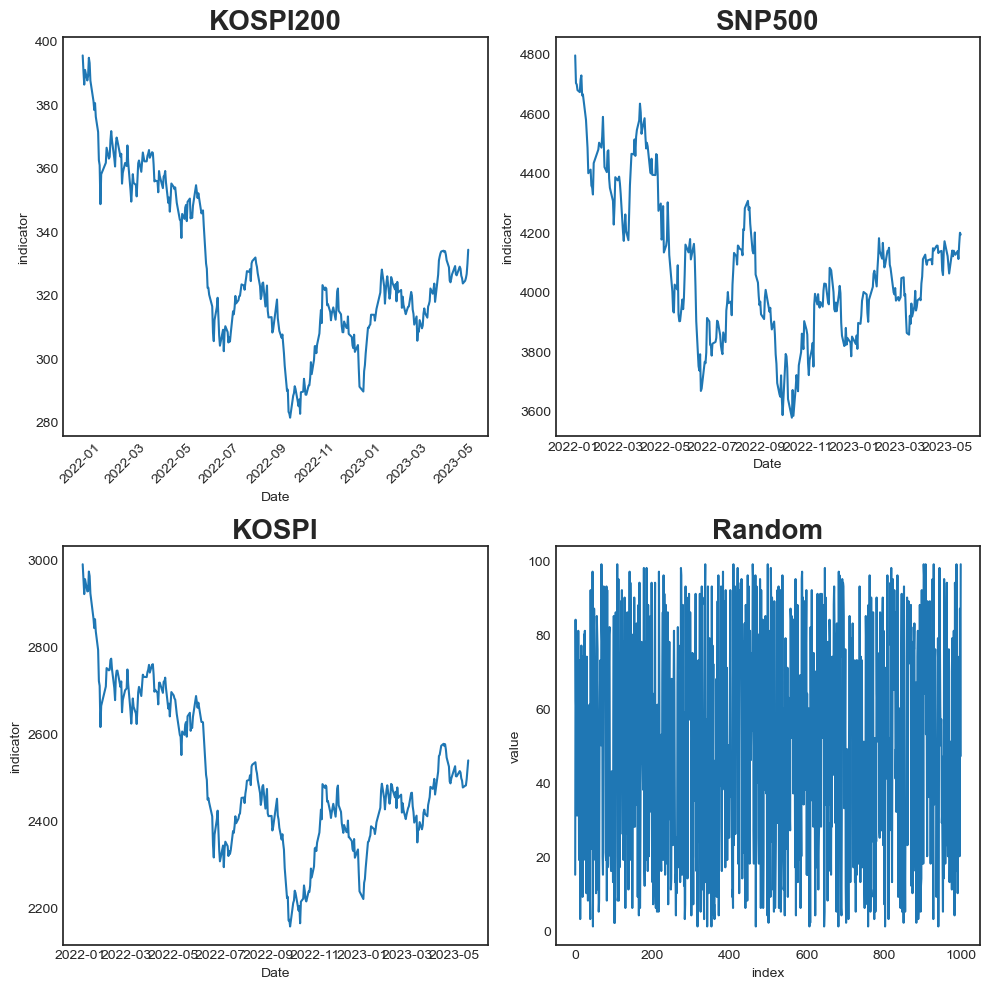

In [66]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(df["Date"], df["KS200"])
plt.title("KOSPI200", fontdict={"size":20, "weight":"bold"})
plt.xlabel("Date")
plt.ylabel("indicator")
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.plot(df["Date"], df["SNP500"])
plt.title("SNP500", fontdict={"size":20, "weight":"bold"})
plt.xlabel("Date")
plt.ylabel("indicator")

plt.subplot(2,2,3)
plt.plot(df["Date"], df["KOSPI"])
plt.title("KOSPI", fontdict={"size":20, "weight":"bold"})
plt.xlabel("Date")
plt.ylabel("indicator")

plt.subplot(2,2,4)
plt.plot(np.random.randint(1, 100, 1000))
plt.title("Random", fontdict={"size":20, "weight":"bold"})
plt.xlabel("index")
plt.ylabel("value")

plt.tight_layout();

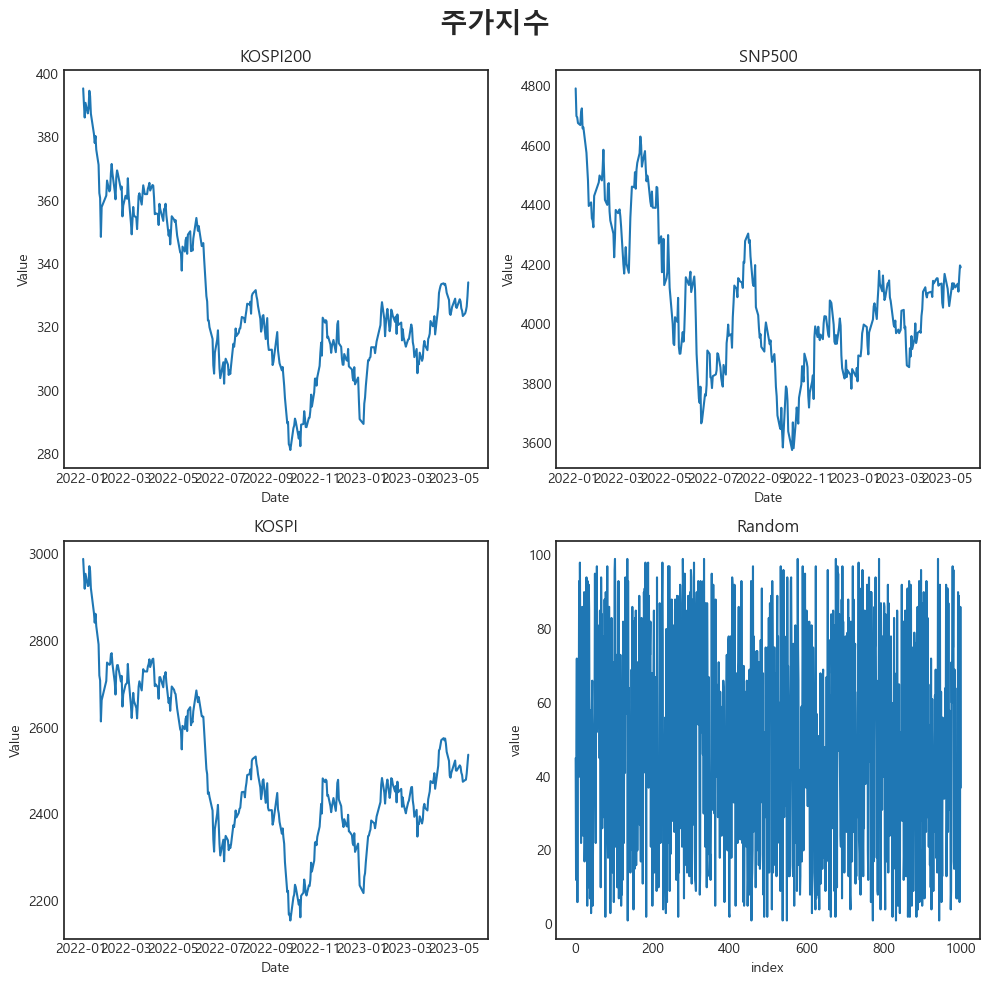

In [78]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.ravel()

axes[0].plot(df["Date"], df["KS200"])
axes[0].set_title("KOSPI200")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Value")

axes[1].plot(df["Date"], df["SNP500"])
axes[1].set_title("SNP500")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Value")

axes[2].plot(df["Date"], df["KOSPI"])
axes[2].set_title("KOSPI")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Value")

axes[3].plot(np.random.randint(1, 100, 1000))
axes[3].set_title("Random")
axes[3].set_xlabel("index")
axes[3].set_ylabel("value")

plt.suptitle("주가지수", fontsize=20, fontweight="bold")
plt.tight_layout();

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,46,22,70,94701,4,1.9,1,212,0,0,0,0,1
2496,2497,63,37,32,93117,3,0.7,2,141,0,0,0,0,0
2497,2498,33,9,14,95133,3,0.9,3,114,0,0,0,0,0
2498,2499,38,14,111,92028,2,6.1,1,326,0,0,0,0,0


In [99]:
data["Education"].value_counts().values

array([1065,  729,  706], dtype=int64)

<AxesSubplot:ylabel='Education'>

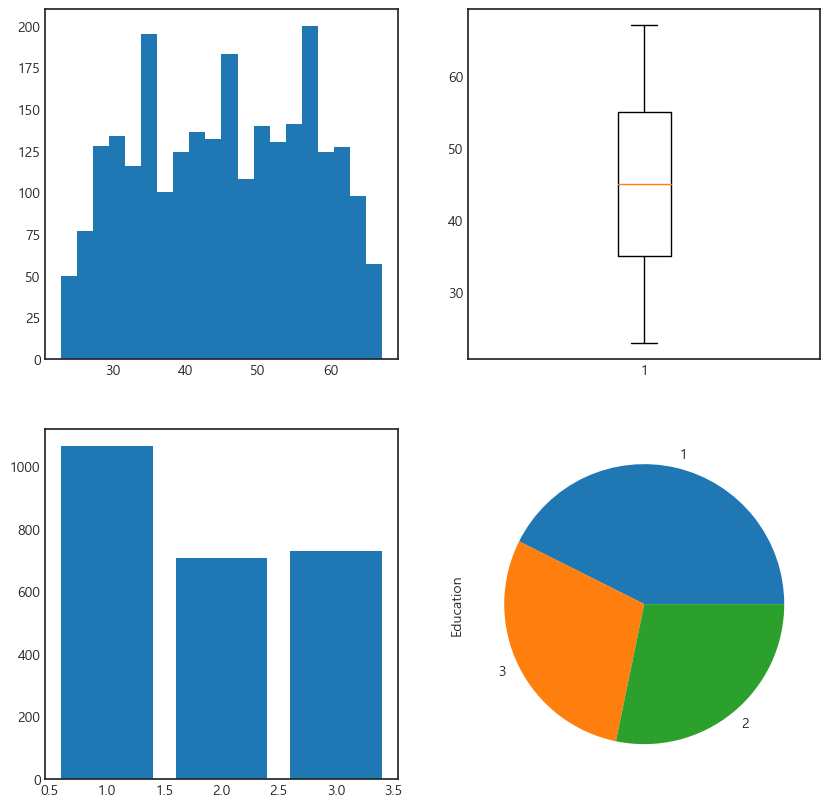

In [106]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.hist(data["Age"], bins=20)

plt.subplot(2,2,2)
plt.boxplot(data["Age"])

plt.subplot(2,2,3)
plt.bar(data["Education"].value_counts().index,data["Education"].value_counts().values)

plt.subplot(2,2,4)
data["Education"].value_counts().plot(kind="pie")

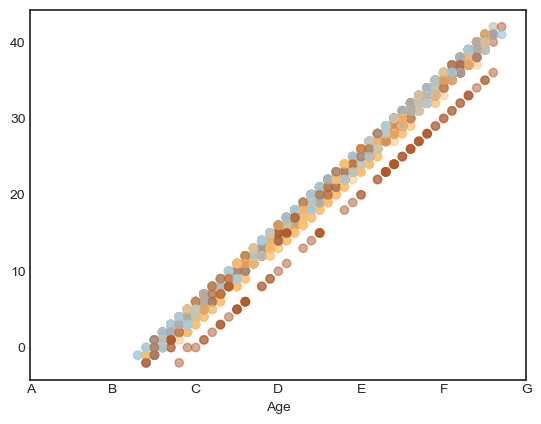

In [199]:
plt.scatter(data["Age"], data["Experience"],
            c=data["Education"], cmap="Paired",
            alpha=0.5)
plt.xlabel("Age")
plt.xticks([10,20,30,40,50,60,70], ["A", "B", "C", "D", "E", "F", "G"]);

Timestamp('2022-09-30 00:00:00')

Text(2022-09-30 00:00:00, 370, 'minimum')

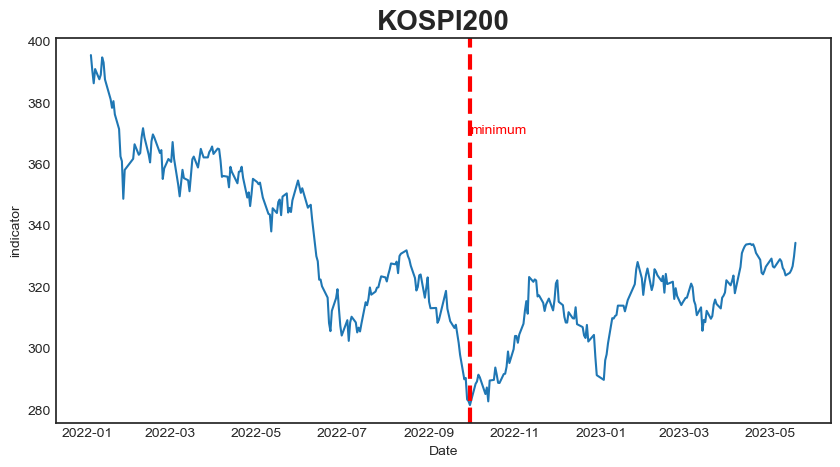

In [156]:
min_idx = df["KS200"].idxmin()
min_date = df["Date"][min_idx]
min_ks200 = df["KS200"].min()

plt.figure(figsize=(10,5))

plt.style.use("seaborn-white")
plt.plot(df["Date"], df["KS200"])
plt.title("KOSPI200", fontdict={"size":20, "weight":"bold"})
plt.xlabel("Date")
plt.ylabel("indicator")

plt.axvline(min_date, color="red", ls="--", lw=3)
plt.text(min_date, 370, "minimum", color="red",ha="left")

Text(2022-07-30 00:00:00, 300, 'Minimum')

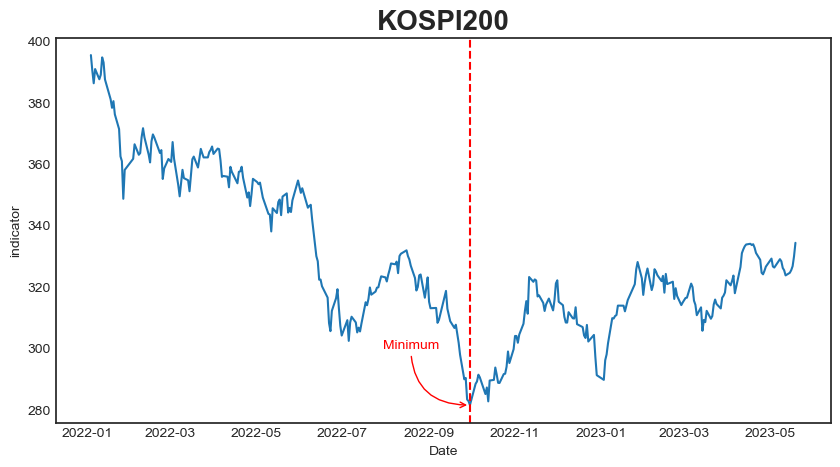

In [169]:
import datetime
# 텍스트 값 위치 설정을 위해 x축이 datetime으로 되어 있어서 밑의 코드 사용
text_date = datetime.datetime(2022,7,30)

plt.figure(figsize=(10,5))

plt.style.use("seaborn-white")
plt.plot(df["Date"], df["KS200"])
plt.title("KOSPI200", fontdict={"size":20, "weight":"bold"})
plt.xlabel("Date")
plt.ylabel("indicator")

plt.axvline(min_date, color="red", ls="--", lw=1.5)
plt.annotate("Minimum", xy=(min_date, min_ks200), xytext=(text_date, 300), color="red",
             arrowprops={"arrowstyle":"->", "connectionstyle":"angle3", "color":"red"})

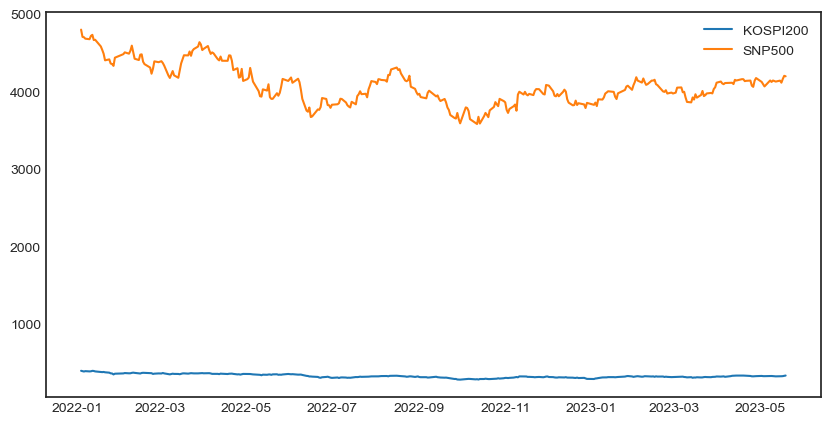

In [177]:
plt.figure(figsize=(10,5))

plt.style.use("seaborn-white")
plt.plot(df["Date"], df["KS200"], label="KOSPI200")
plt.plot(df["Date"], df["SNP500"], label="SNP500")
plt.legend(loc="best")

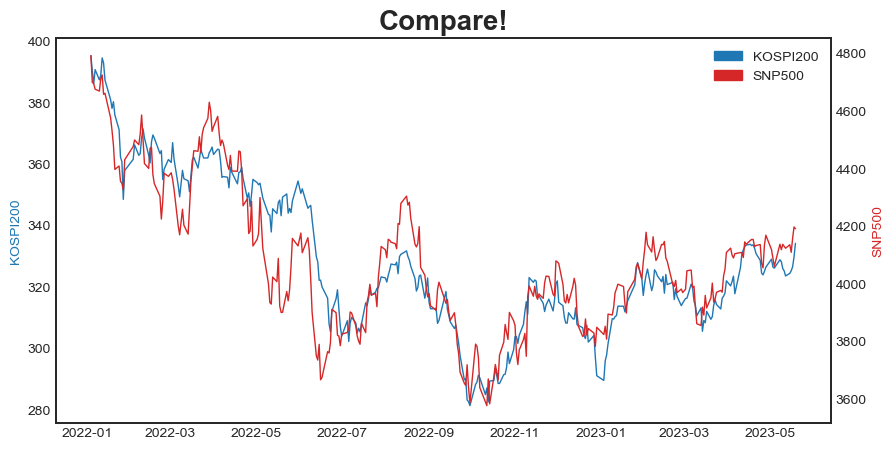

In [195]:
fig, axes = plt.subplots(1,1,figsize=(10,5))
axes.plot(df["Date"], df["KS200"], label="KOSPI200", c="tab:blue", lw=1)
axes.set_ylabel("KOSPI200", color="tab:blue")


new = axes.twinx()
new.plot(df["Date"], df["SNP500"], label="SNP500", c="tab:red", lw=1)
new.set_ylabel("SNP500", color="tab:red")

k = mpatches.Patch(color = "tab:blue", label = "KOSPI200")
u = mpatches.Patch(color = "tab:red", label = "SNP500")
axes.legend(handles = [k,u])

plt.title("Compare!", fontdict={"size":20, "weight":"bold"});